# LAB 2: Linear Equations and Matrix Algebra

In this lab you will use python to study the following topics:

- Solving a system of linear equations by using the reduced row echelon form of the augmented matrix of the system.

- Forming linear combinations of a set of vectors and the fundamental concepts of linear independence.

- Matrix multiplication and its properties.

# First: you should run this cell

In [2]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym


# matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))


def rref(A):
    return np.array(sym.Matrix(A).rref(iszerofunc=lambda x:sym.comp(x,0,1e-13))[0], np.float64)


def nulbasis(A):
    A = sym.Matrix(A)
    tmp =  A.nullspace()
    n = len(tmp)
    m = len(tmp[0])
    N = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
                N[i,j] = tmp[j][i] 
    return N

# Question 1. Solving Ax = b

In this question you will find the general solution $x \in R^3$ to a linear system $Ax = b$ of 3 equations in 5
variables $x_1, x_2, x_3, x_4, x_5$. Here $A$ is the $3 \times 5$ coeffient matrix system $b \in R^3$ is the given right-hand side of the system

<h4> 
    (a) Use rmat function that was defined in the first cell to generate a random $3 \times5$ integer matrix $A$ and to check that columns 1, 2, 3 of $A$ are the pivot columns.
</h4>

- `A = rmat(3, 5)`
- `np.linalg.matrix_rank(A[:, 0:3])`


In [5]:
A = rmat(3, 5)
print("----------A-----------")
print(A)
print("---------------------")

#Rank..
rank_A = np.linalg.matrix_rank(A[:, 0:3])
print("----------rank(A)-----")
print(rank_A)
print("---------------------")

----------A-----------
[[8. 0. 2. 7. 6.]
 [5. 6. 5. 6. 5.]
 [4. 9. 6. 7. 2.]]
---------------------
----------rank(A)-----
3
---------------------


In [2]:
#type your code here:


----------A-----------
[[9. 9. 2. 1. 7.]
 [7. 9. 6. 9. 3.]
 [1. 9. 0. 0. 4.]]
---------------------
----------rank(A)-----
3
---------------------


Note the use of the colon operator to select columns 1, 2, 3 of $A$. If the rank is less than 3, generate a new A
(this is unlikely, but it can happen). Include all the matrices that you generate this way in your lab report.
<h4>
When you have an $A$ for which the rank of the first three columns is 3:
</h4>

- Generate a random vector $b \in R^3$

- The reduced row echelon form R of the augmented matrix $\begin{bmatrix} A & b   \end{bmatrix}$:


In [6]:
if np.linalg.matrix_rank(A[:, 0:3]) == 3:
    b = np.random.rand(3, 1) * 10

    augmented_matrix = np.hstack((A, b)) #A and Generated b with herzontal stack to buld augumented matrix ...

    R = rref(augmented_matrix)

    print("-------b--------")
    print(b)
    print("----------------")
#####################################################
    print("-------augmented_matrix---------")
    print(augmented_matrix)
    print("----------------")

    # ################################################
    print("-------R------------------------------------------")
    print(R)
    print("--------------------------------------------------")
else:
    print("The rank of the first three columns of A is not 3.")

-------b--------
[[3.53372183]
 [8.34759236]
 [9.99548487]]
----------------
-------augmented_matrix---------
[[8.         0.         2.         7.         6.         3.53372183]
 [5.         6.         5.         6.         5.         8.34759236]
 [4.         9.         6.         7.         2.         9.99548487]]
----------------
-------R------------------------------------------
[[ 1.          0.          0.          1.3        -0.4         0.04975508]
 [ 0.          1.          0.          1.33333333 -2.66666667  0.04326901]
 [ 0.          0.          1.         -1.7         4.6         1.56784058]]
--------------------------------------------------


In [3]:
#type your code here:


-------b--------
[[5.]
 [8.]
 [2.]]
----------------
-------augmented_matrix---------
[[9. 9. 2. 1. 7. 5.]
 [7. 9. 6. 9. 3. 8.]
 [1. 9. 0. 0. 4. 2.]]
----------------
-------R------------------------------------------
[[ 1.          0.          0.         -0.33333333  0.55555556  0.16666667]
 [ 0.          1.          0.          0.03703704  0.38271605  0.2037037 ]
 [ 0.          0.          1.          1.83333333 -0.72222222  0.83333333]]
--------------------------------------------------


<h4>
     To get the reduced row echelon form S = rref(A) just remove the last column from R:
</h4>

- `S = R[:, :-1] or R[:, 0:5]`


In [7]:
S = R[:, :-1]
print("--------S------------")
print(S)
print("---------------------")

--------S------------
[[ 1.          0.          0.          1.3        -0.4       ]
 [ 0.          1.          0.          1.33333333 -2.66666667]
 [ 0.          0.          1.         -1.7         4.6       ]]
---------------------


In [4]:
#type your code here:



--------S------------
[[ 1.          0.          0.         -0.33333333  0.55555556]
 [ 0.          1.          0.          0.03703704  0.38271605]
 [ 0.          0.          1.          1.83333333 -0.72222222]]
---------------------


(Note the use of the colon operator to select columns 1 to 5 of R).
<h4>Check by python that S = rref(A)</h4>

In [10]:
S_rref = rref(A)
print("--------rref(A)------------")
print(S_rref)
print("---------------------")

if np.array_equal(S, S_rref):
    print("S is equal to RREF of A")
else:
    print("S is NOT equal to RREF of A")

--------rref(A)------------
[[ 1.          0.          0.          1.3        -0.4       ]
 [ 0.          1.          0.          1.33333333 -2.66666667]
 [ 0.          0.          1.         -1.7         4.6       ]]
---------------------
S is equal to RREF of A


In [5]:
#type your code here:


--------rref(A)------------
[[ 1.          0.          0.         -0.33333333  0.55555556]
 [ 0.          1.          0.          0.03703704  0.38271605]
 [ 0.          0.          1.          1.83333333 -0.72222222]]
---------------------


1. Which columns of $S$ are the pivot columns?
2. What is the rank of $R$ and the rank of $A$?
3. What is the nullity of $A$ and which variables $x_i$ are be the free variables?
4. Why does the equation $Ax = b$ have a solution?



### Pivot Columns in S:
- Columns 1, 2, and 3 of matrix S are pivot columns as they contain the leading 1's in the reduced row echelon form.

### Rank of R:
- The rank of matrix R is 3, which is the number of pivot columns.

### Rank of A:
- To determine the rank of matrix A, we can use `numpy.linalg.matrix_rank(A)`and that gives `Rank_A=3`.
- The rank of matrix A indicates the maximum number of linearly independent rows or columns in matrix A.

### Nullity of A:
- The nullity of matrix A can be calculated as the difference between the number of columns and the rank of A `Nullity = Number of columns - Rank of the matrix`, `nullity_A = A.shape[1] - rank_A = 2` and the nullity was Two.  
- if we don't have nullty columns so all columns will be independant .

### Free variables of A :
- Free variables correspond to the number of columns that are not pivot columns in the row echelon form of the matrix So we will try to extract these columns , I will Use sympy To help me to get the `pivot_indices` after that get the indices for NOT Pivod so `the columns [3, 4] was a free Variables` .
### Solution of Ax = b:
- Whether the equation Ax = b has a solution depends on whether the rank of the augmented matrix [A | b] equals the rank of A.
- To compute this, we can use NumPy's functions: `numpy.linalg.matrix_rank` to calculate the rank of the augmented matrix and `numpy.hstack` to form the augmented matrix [A | b].
- If the ranks are equal, the system has a solution; otherwise, it does not.

In [12]:
rank_A = np.linalg.matrix_rank(A)
nullity_A = A.shape[1] - rank_A
nullity_A

2

In [17]:
A_sym = sym.Matrix(A)
rref_A, pivot = A_sym.rref()
pivot_indices = list(pivot)

# Handel error we will get 
pivot_indices = [int(index) for index in pivot_indices]

# Indices of free variables
free_variable_indices = [i for i in range(A.shape[1]) if i not in pivot_indices]
free_variable_indices

[3, 4]

In [18]:
augmented_matrix = np.hstack((A, b))

rank_A = np.linalg.matrix_rank(A)
rank_augmented = np.linalg.matrix_rank(augmented_matrix)

# Check if the ranks are equal OR NOT ?
if rank_A == rank_augmented:
    print("The equation has solution")
else:
    print("The equation doesn't have solution")

The equation has solution


#### Print the rank of A, R, and S matrices

In [11]:
rank_A = np.linalg.matrix_rank(A)
rank_R = np.linalg.matrix_rank(R)
rank_S = np.linalg.matrix_rank(S)

print(rank_A)
print("---------------------")
print(rank_R)
print("---------------------")
print(rank_S)
print("---------------------")

3
---------------------
3
---------------------
3
---------------------


In [6]:
#type your code here:


3
---------------------
3
---------------------
3
---------------------


#### (b) Use python to obtain (the last column of $R$), `c = R[:, [-1]]`. set `x = np.block([[c], [0], [0]])`. $x \in R^5$ and the last two components of $x$ are zeros. then:


- Calculate by python that $Ax - b = 0$ and $Sx - c = 0$.




In [27]:
# last column of R
c = R[:, [-1]]

# vector x and the last two components are zerooo..
x = np.block([[c], [0], [0]])

# A @ x - b | S @ x - c
Ax_b = np.dot(A, x) - np.round(b, decimals=8)
Sx_c = np.dot(S, x) - np.round(c, decimals=8)

print("-----------c--------------")
print(np.round(c, decimals=8))
print("-------------------------")
print("-----------x--------------")
print(np.round(x, decimals=8))
print("-------------------------")
print("--------A @ x - b--------------")
print(np.round(Ax_b, decimals=8))
print("-------------------------")
print("--------S @ x - c--------------")
print(np.round(Sx_c, decimals=8))
print("-------------------------")

-----------c--------------
[[0.04975508]
 [0.04326901]
 [1.56784058]]
-------------------------
-----------x--------------
[[0.04975508]
 [0.04326901]
 [1.56784058]
 [0.        ]
 [0.        ]]
-------------------------
--------A @ x - b--------------
[[-0.]
 [-0.]
 [ 0.]]
-------------------------
--------S @ x - c--------------
[[ 0.]
 [-0.]
 [ 0.]]
-------------------------


In [7]:
#type your code here:


-----------c--------------
[[0.16666667]
 [0.2037037 ]
 [0.83333333]]
-------------------------
-----------x--------------
[[0.16666667]
 [0.2037037 ]
 [0.83333333]
 [0.        ]
 [0.        ]]
-------------------------
--------A @ x - b--------------
[[0.]
 [0.]
 [0.]]
-------------------------
--------A @ x - c--------------
[[0.]
 [0.]
 [0.]]
-------------------------


#### (c) Use python to calculate

- `u = np.block([[-S[:, [3]]], [1], [0]])`
- `v = np.block([[-S[:, [4]]], [0], [1]])`


1. Give a handwritten explanation, using symbols and linear algebra, rather than numbers, to show why u and v are the vectors that appear in the vector form of the general solution to Ax = 0.
    - Confirm by calculating `S @ u`, `A @ u`, `S @ v`, `A @ v`. You should get vectors that are (approximately) zero.
    - Now generate a random linear combination of u and v by the commands `s = np.random.rand(1)`, `t = np.random.rand(1)`, and `y = s * u + t * v` (Note that each occurrence of np.random.rand(1) generates a different random coefficient).

2. What properties of matrix and vector algebra ensure that Ay = 0?
    - Confirm by a python calculation that `A @ y` is approximately zero. 







# 2. What properties of matrix and vector algebra ensure that Ay = 0?

### Properties:
- \( u \) and \( v \) are chosen from the null space of \( A \) (or the left null space of \( A^T \)), satisfying \( Au = 0 \) and \( Av = 0 \) respectively. Therefore, any linear combination of \( u \) and \( v \) will also satisfy \( Ay = 0 \) for any \( y \) in the form \( y = su + tv \), where \( s \) and \( t \) are scalar coefficients.

In [29]:
# Calculate vectors u and v
u = np.block([[-S[:, [3]]], [1], [0]])
v = np.block([[-S[:, [4]]], [0], [1]])

# S @ u, A @ u, S @ v, A @ v
Su = np.dot(S, u)
Au = np.dot(A, u)
Sv = np.dot(S, v)
Av = np.dot(A, v)

print("-----------u-----------")
print(u)
print("----------------------")
print("-----------v-----------")
print(v)
print("----------------------")
print("-----------S @ u-----------")
print(Su)
print("----------------------")
print("----------A @ u------------")
print(Au)
print("----------------------")
print("----------S @ v------------")
print(Sv)
print("----------------------")
print("----------A @ v------------")
print(Av)
print("----------------------")

# random coefficients
s = np.random.rand(1)
t = np.random.rand(1)

# linear combination y = s*u + t*v
y = s * u + t * v

# A @ y
Ay = np.dot(A, y)

print("----------------------")
print("---------A @ y-------------")
print(Ay)
print("----------------------")

-----------u-----------
[[-1.3       ]
 [-1.33333333]
 [ 1.7       ]
 [ 1.        ]
 [ 0.        ]]
----------------------
-----------v-----------
[[ 0.4       ]
 [ 2.66666667]
 [-4.6       ]
 [ 0.        ]
 [ 1.        ]]
----------------------
-----------S @ u-----------
[[0.]
 [0.]
 [0.]]
----------------------
----------A @ u------------
[[0.]
 [0.]
 [0.]]
----------------------
----------S @ v------------
[[0.]
 [0.]
 [0.]]
----------------------
----------A @ v------------
[[0.00000000e+00]
 [0.00000000e+00]
 [3.55271368e-15]]
----------------------
----------------------
---------A @ y-------------
[[8.88178420e-16]
 [0.00000000e+00]
 [3.55271368e-15]]
----------------------


In [8]:
#type your code here:


-----------u-----------
[[ 0.33333333]
 [-0.03703704]
 [-1.83333333]
 [ 1.        ]
 [ 0.        ]]
----------------------
-----------v-----------
[[-0.55555556]
 [-0.38271605]
 [ 0.72222222]
 [ 0.        ]
 [ 1.        ]]
----------------------
-----------S @ u-----------
[[0.]
 [0.]
 [0.]]
----------------------
----------A @ u------------
[[ 0.00000000e+00]
 [-2.22044605e-16]
 [ 0.00000000e+00]]
----------------------
----------S @ v------------
[[0.]
 [0.]
 [0.]]
----------------------
----------A @ v------------
[[ 2.22044605e-16]
 [-8.88178420e-16]
 [ 4.44089210e-16]]
----------------------
---------A @ y-------------
[[1.11022302e-16]
 [5.55111512e-16]
 [2.22044605e-16]]
----------------------


#### (d) Use python to calculate `z = x + y` .
- What properties of matrix and vector algebra imply that $Az = b$?
- Confirm by a python calculation that `A @ z - b` is approximately zero.

### Understanding Matrix-Vector Transformation in Linear Algebra

In linear algebra, matrices serve as representations of transformations applied to vectors within a vector space. When we have the equation \( Az = b \), it signifies the application of a transformation represented by matrix \( A \) to the vector \( z \), resulting in the transformed vector \( b \).

- **Matrix as a Transformation:**
  - Matrices, like \( A \), encapsulate transformation rules applied to vectors.
  - Each column of matrix \( A \) signifies a specific transformation or operation applied to the vector \( z \).
  - The resulting vector \( b \) portrays the vector \( z \) transformed after the application of matrix transformation \( A \) (b)==> Will be in the same span for a and z.

- **Verification in Python:**
  - Verifying \( Az = b \) in Python, through the calculation \( A @ z - b \), validates whether the transformation embodied by matrix \( A \) applied to vector \( z \) yields the anticipated vector \( b \) or is approximately equal to \( b \) within the constraints of numerical precision.

In [33]:
z = x + y

# A @ z - b
Az_b = np.dot(A, z) - np.round(b, decimals=8)

print("A @ z - b:")
print(np.round(Az_b, decimals=8))
print("----------------------")

A @ z - b:
[[-0.]
 [-0.]
 [ 0.]]
----------------------


In [9]:
#type your code here:



-----------A @ z - b--------------
[[0.]
 [0.]
 [0.]]
----------------------------------


# Question 2. Spanning Sets and Linear Independence

#### Generate four random vectors in R3 by the command
- `u1 = rvect(3)`
- `u2 = rvect(3)`
- `u3 = rvect(3)`
- `u4 = rvect(3)`




#### (a) Consider the set of vectors S = {u1, u2, u3}. To determine whether S is linearly independent, form the matrix A with the vectors from S as columns and calculate its reduced row echelon form
- `A = np.block([u1, u2, u3])`
- `rref(A)`

#### Use these calculations to answer the following questions:

1. How many free variables does the equation Ax = 0 have?

2. Is the set S linearly independent or linearly dependent? Why?

### Analysis of Linear Independence for Set S = {u1, u2, u3}

Upon analyzing the reduced row echelon form (RREF) of matrix A:


**Observation:**
- Every column of the RREF contains a leading 1 (pivot) with zeros elsewhere, indicating that each column of matrix A has a pivot position.
- No columns in the RREF lack pivot positions.
- Consequently, the equation Ax = 0 will have no free variables.

**Conclusion:**
Therefore, the set S = {u1, u2, u3} is linearly independent. Each column in matrix A is a pivot column, resulting in a trivial solution (no free variables) for the equation Ax = 0. This confirms the linear independence of the vectors in set S.


In [34]:
# u1, u2, u3
u1 = rvect(3)
u2 = rvect(3)
u3 = rvect(3)

A = np.block([u1, u2, u3])

print("------A---------")
print(A)
print("----------------")

rref_A = rref(A)

print("------rref(A)---------")
print(rref_A)
print("----------------")

------A---------
[[6. 8. 3.]
 [2. 7. 3.]
 [9. 9. 4.]]
----------------
------rref(A)---------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
----------------


In [10]:
####type your code here:



------A---------
[[0. 3. 3.]
 [2. 7. 2.]
 [8. 0. 0.]]
----------------
------rref(A)---------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
----------------


#### (b) Consider the set of vectors T = {u1, u2, u3, u4}. To determine whether T is linearly independent, form the matrix B with the vectors from T as columns and calculate its reduced row echelon form:

- `B = [u1 u2 u3 u4]`
- `rref(B)`

#### Use these calculations to answer the following questions:

1. How many free variables does the equation $Bx = 0$ have?

2. Is the set T linearly independent or linearly dependent?

### Answers :- 

- The reduced row echelon form (RREF) of **B** (**rref(B)**) suggests that there is a pivot in every column, indicating no free variables in the system.

- Since there are no free variables (i.e., every column is a pivot column), the equation **Bx = 0** only has the trivial solution.

- Therefore, the set **T** containing the vectors used to form matrix **B** is linearly independent.

- This conclusion is drawn from the fact that the RREF of **B** shows no free variables, implying a unique solution to **Bx = 0** and confirming the linear independence of the set **T = {u1, u2, u3, u4}**.


In [35]:
u1 = rvect(3)
u2 = rvect(3)
u3 = rvect(3)
u4 = rvect(3)

B = np.block([u1, u2, u3, u4])
rref_B = rref(B)
print("------B---------")
print(B)
print("----------------")

print("------rref(B)---------")
print(rref_B)
print("----------------")

------B---------
[[2. 3. 8. 7.]
 [7. 5. 4. 6.]
 [8. 2. 8. 8.]]
----------------
------rref(B)---------
[[1.         0.         0.         0.22222222]
 [0.         1.         0.         0.33333333]
 [0.         0.         1.         0.69444444]]
----------------


In [11]:
#type your code here:


------B---------
[[0. 3. 3. 1.]
 [2. 7. 2. 4.]
 [8. 0. 0. 2.]]
----------------
------rref(B)---------
[[ 1.          0.          0.          0.25      ]
 [ 0.          1.          0.          0.56666667]
 [ 0.          0.          1.         -0.23333333]]
----------------


#### (c) Let v be a random linear combination of u1 and u2:

- `v = np.random.rand(1) * u1 + np.random.rand(1) * u2`

#### Thus v is of the form c1u1 + c2u2 for some scalars c1, c2. Consider the set of vectors U = {u1, u2, v}.

1. Is the set U linearly independent or linearly dependent?
2. Answer first without calculation using the definition of linear independent sets.



### Linear Independence of U:- 

#### To determine whether the set \( U = \{u_1, u_2, v\} \) is linearly independent or dependent, consider the definition of linear independence:

- A set of vectors is linearly independent if no vector in the set can be represented as a linear combination of the others.

- In this scenario, given the vectors \( u_1 \), \( u_2 \), and \( v \), where \( v \) is constructed as a random linear combination of \( u_1 \) and \( u_2 \), it implies that \( v \) can be expressed using \( u_1 \) and \( u_2 \). Consequently, \( v \) lies within the span of \( u_1 \) and \( u_2 \).

- Therefore, by definition, as \( v \) can be obtained by combining \( u_1 \) and \( u_2 \), the set \( U = \{u_1, u_2, v\} \) is linearly dependent.

- The Python calculation confirmed this assessment by showing that the reduced row echelon form of matrix \( U \) has a column that is not a pivot column, indicating linear dependence within the set.

We can conclud that set \( U \) is linearly dependent.


#### Check your answer by python using the method of part (a).

In [36]:
u1 = rvect(3)
u2 = rvect(3)
v = np.random.rand(1) * u1 + np.random.rand(1) * u2
U = np.column_stack((u1, u2, v))
rref_U = rref(U)  

# Display the matrix U and its reduced row echelon form
print("------U---------")
print(U)
print("----------------")
print("------rref(U)---------")
print(rref_U)
print("----------------")


------U---------
[[6.         0.         0.89172363]
 [1.         2.         1.95013469]
 [3.         7.         6.7511611 ]]
----------------
------rref(U)---------
[[1.         0.         0.1486206 ]
 [0.         1.         0.90075704]
 [0.         0.         0.        ]]
----------------


In [12]:
#type your code here:


------U---------
[[0.         3.         0.84174763]
 [2.         7.         2.81036291]
 [8.         0.         3.3851404 ]]
----------------
------rref(U)---------
[[1.         0.         0.42314255]
 [0.         1.         0.28058254]
 [0.         0.         0.        ]]
----------------


# Question 3 :Visualizing the Column Space

In this question you will determine visually whether given vectors lie in the column space of a matrix.
Random Seed: Initialize the random number generator by typing
rand(’seed’, abcd)
where abcd are the last four digits of your student ID number. This will ensure that you generate your own
particular random vectors and matrices.

#### Now generate a random $3 \times 2$ integer matrix $A$ by the python and calculate rank(A). Since $A$ is a random matrix, the rank is very likely to be 2. If the rank is not 2, generate another A. Repeat the test until you get a matrix with rank 2.

- `A = rmat(3, 2)`
- `np.linalg.matrix_rank(A)`


In [40]:
np.random.seed(5299)

# Generate a random 3x2 integer matrix A until its rank is 2 ..... 
rank = 0
while rank != 2:
    A = rmat(3, 2)
    rank = np.linalg.matrix_rank(A)

# Display the generated matrix A and its rank
print("------------A-------------")
print(A)
print("--------------------------")
print("------------rank(A)-------------")
print(rank_A)
print("--------------------------")

------------A-------------
[[6. 8.]
 [0. 7.]
 [8. 9.]]
--------------------------
------------rank(A)-------------
2
--------------------------


In [13]:
#type your code here:


------------A-------------
[[7. 8.]
 [5. 6.]
 [3. 8.]]
--------------------------
------------rank(A)-------------
2
--------------------------


#### Use this matrix in the rest of the question. If you need to generate more than one matrix, include all the matrices you generate in your lab report.

#### (a) Define `u = A[:,[0]]`, `v = A[:,[1]]` to be the column vectors for A. To graph the column space Col(A) of A, enter the python commands:
- `s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))`
- `X = s * u[0] + t * v[0]`
- `Y = s * u[1] + t * v[1]`
- `Z = s * u[2] + t * v[2]`
- Use matplotlib to graph the cloumn space using `plot_surface` as in this [example](https://matplotlib.org/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py)
- Set graph axis limit -10, 10.
- Set the color map of the graph to `cm.hot`.

------------u-------------
[[6.]
 [0.]
 [8.]]
--------------------------
------------v-------------
[[8.]
 [7.]
 [9.]]
--------------------------


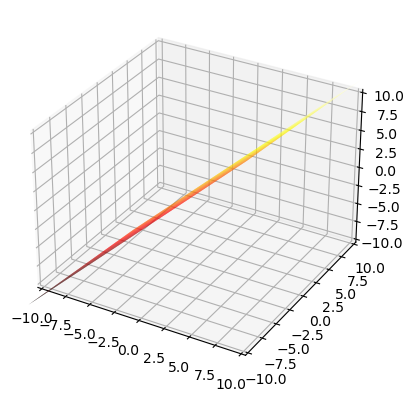

In [42]:
# u and v as column vectors A
u = A[:, [0]]
v = A[:, [1]]


print("------------u-------------")
print(u)
print("--------------------------")
print("------------v-------------")
print(v)
print("--------------------------") 

# Create a meshgrid for s and t values
s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))

# X, Y, Z for plotting
X = s * u[0] + t * v[0]
Y = s * u[1] + t * v[1]
Z = s * u[2] + t * v[2]

# Plot the column space using plot_surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.hot)

# graph axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

plt.show()

------------u-------------
[[7.]
 [5.]
 [3.]]
--------------------------
------------v-------------
[[8.]
 [6.]
 [8.]]
--------------------------


C:\Users\OMARME~1\AppData\Local\Temp/ipykernel_23816/3205482725.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


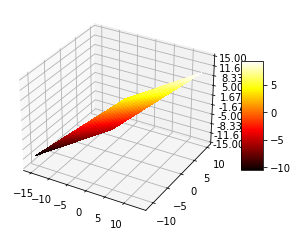

In [14]:
#type your code here


#### (b) Generate a random vector in R3 using the `rvect` function
- b = rvect(3)

In [43]:
b = rvect(3)

print("------------b-------------")
print(b)
print("--------------------------")

------------b-------------
[[3.]
 [8.]
 [6.]]
--------------------------


In [15]:
#type your code here:


------------b-------------
[[2.]
 [2.]
 [9.]]
--------------------------


#### To graph the line Span(b) in the same figure as Col(A):
- Copy the previous code that was used to graph Col(A)
- Generate array r. `r = np.arange(-1, 1, 0.05)`
- Plot the span(b). `ax.plot(r * b[0], r * b[1], r * b[2], 'b+', markersize=20)`
- Note that the previous step should be before plt.show() to plot on the same figure.
- Use `ax.view_init(45, 45)` change the values 45, 45 to rotate the figure to different view.

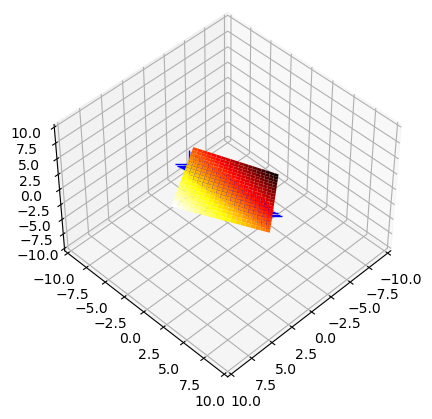

In [44]:
# Plotting Col(A) and Span(b) in the same figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a grid
s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
X = s * u[0] + t * v[0]
Y = s * u[1] + t * v[1]
Z = s * u[2] + t * v[2]

# Plot the column space of A
ax.plot_surface(X, Y, Z, cmap='hot')

r = np.arange(-1, 1, 0.05)

# Plot the span of b
ax.plot(r * b[0], r * b[1], r * b[2], 'b+', markersize=20)

# Rotate 
ax.view_init(45, 45)

# Set axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

plt.show()

C:\Users\OMARME~1\AppData\Local\Temp/ipykernel_23816/2380683397.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


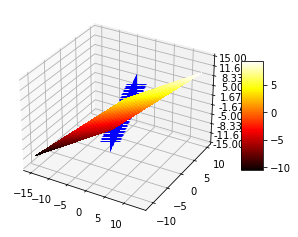

In [16]:
#type your code here:


#### (c) Can you find a vector $x \in R^2$ such that $Ax = b$, where $A$ is the matrix and $b$ is the vector that you have generated? Explain why or why not using the graph from part (b).


### -------------------------------------Type your answer here------------------------------------------------------------ ###

we have a matrix A of dimensions 3x2, mapping vectors from R^2 to R^3. The vector b belongs to R^3.

The equation Ax=b represents the relationship between matrix A and vector b. The column space of matrix A encompasses all possible linear combinations of its columns, indicating the range of vectors it can produce.

From the graph shown in part (b), the line representing the span of vector b (denoted as Span(b)) intersects or touches the column space of matrix A. This implies that vector b exists within the column space of matrix A.

The intersection between Span(b) and the column space of A signifies the existence of at least one vector x in R^2 such that Ax=b. However, due to A being a non-square matrix (3x2), the solution x might not be unique, suggesting that there could be an infinite set of solutions. Despite this, there does exist a solution, as evident from the intersection observed in the 3D graph.



### ---------------------------------------------------------------------------------------------------------------------------------- ###

#### (d) Generate a random vector lying in Col(A) where:

- `z = np.random.rand(2, 1)`
- `c = A @ z`

In [45]:
z = np.random.rand(2, 1)
c = A @ z

# Display the vector c
print("---------c-------------")
print(c)
print("-----------------------")

---------c-------------
[[7.51153725]
 [1.61028326]
 [9.63198223]]
-----------------------


In [17]:
#type your code here:


---------c-------------
[[7.06252724]
 [5.23346768]
 [6.04768326]]
-----------------------


#### Plot a new graph of Span(c) and Col(A)

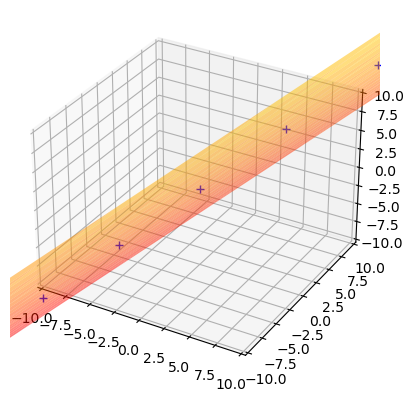

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s, t = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))
X = s * u[0] + t * v[0]
Y = s * u[1] + t * v[1]
Z = s * u[2] + t * v[2]
ax.plot_surface(X, Y, Z, cmap='hot', alpha=0.5)

# Span(c)
r = np.arange(-10, 10, 1)
span_c = r * c.reshape(-1, 1)
ax.plot(span_c[0], span_c[1], span_c[2], 'b+') 

# Setting axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

# Show the plot
plt.show()

C:\Users\OMARME~1\AppData\Local\Temp/ipykernel_23816/3222810454.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


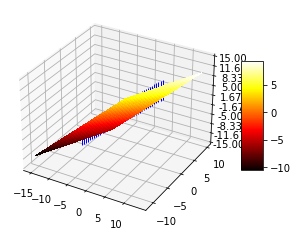

In [18]:
#type your code here


# Question 4: Reduced Row Echelon Form and Null Space

#### First generate a random $3 \times 3$ integer matrix $B$ and check its rank:
- `B = rmat(3, 3)`
- `np.linalg.matrix_rank(B)`

In [50]:
B = rmat(3, 3)
print("-----------B---------------")
print(B)
print("--------------------------")

# Check the rank of matrix B
rank_B = np.linalg.matrix_rank(B)
print("----------rank(B)------------")
print(rank_B)
print("--------------------------")

-----------B---------------
[[6. 0. 3.]
 [4. 6. 0.]
 [7. 2. 2.]]
--------------------------
----------rank(B)------------
3
--------------------------


In [19]:
#type your code here:


-----------B---------------
[[1. 8. 7.]
 [8. 8. 8.]
 [8. 0. 1.]]
--------------------------
----------rank(B)------------
3
--------------------------


#### Since $B$ is random, it is very likely to have rank $3$. If not, generate another $B$ until this is true. Now use $B$ to define a $3 \times 5$ matrix $A$ and its reduced row echelon form $R$ by

- `A = np.block([B[:, [0]], B[:, [1]], 2 * B[:, [0]] + 3 * B[:, [1]], 4 * B[:, [0]] - 5 * B[:, [1]], B[:, [2]]])`
- `R = rref(A)`

#### (a) Use the definition of $A$ in terms of $B$ and the Column Correspondence Property to answer the following.

- Explain why columns #1, #2, and #5 are the pivot columns of A and R.


### Pivot Columns in Matrices A and R :-


In both matrices A and its reduced row echelon form R:

- **Column #1** and **Column #2** serve as pivot columns due to their linear independence and the presence of leading 1's in R. These columns are fundamental in determining the rank of the matrix.

- **Column #5** is also a pivot column in both A and R. Although it doesn't contain a leading 1 in R, it's an original, non-redundant column in A, contributing to the rank of the matrix.

The pivot columns, specifically #1, #2, and #5, are crucial in understanding the independence of columns and establishing the rank of the matrix.


In [52]:
rank_B = 0
while rank_B != 3:
    B = np.random.randint(0, 10, size=(3, 3)) 
    rank_B = np.linalg.matrix_rank(B)

# matrix A using columns from matrix B
A = np.block([B[:, [0]], B[:, [1]], 2 * B[:, [0]] + 3 * B[:, [1]], 4 * B[:, [0]] - 5 * B[:, [1]], B[:, [2]]])

# Calculate the reduced row echelon form of matrix A
R = rref(A)
print("-----------A---------------")
print(A)
print("--------------------------")
print("----------R------------")
print(R)
print("--------------------------")

-----------A---------------
[[  9   8  42  -4   0]
 [  0   4  12 -20   0]
 [  7   3  23  13   6]]
--------------------------
----------R------------
[[ 1.  0.  2.  4.  0.]
 [ 0.  1.  3. -5.  0.]
 [ 0.  0.  0.  0.  1.]]
--------------------------


In [20]:
#type your code here:


-----------A---------------
[[  1.   8.  26. -36.   7.]
 [  8.   8.  40.  -8.   8.]
 [  8.   0.  16.  32.   1.]]
--------------------------
----------R------------
[[ 1.  0.  2.  4.  0.]
 [ 0.  1.  3. -5.  0.]
 [ 0.  0.  0.  0.  1.]]
--------------------------


#### (b) Let $V$ be the set of solutions to the homogeneous system of equations $Ax = 0$ (the null space of $A$). In the equation $Ax = 0$ (where $x \in R^5$), 

- what are the free variables and what is dim V ?

### Answer :- 
- The Free Variables is [2, 3] and the dim of V is Two .. 

In [55]:
A_sym = sym.Matrix(A)
rref_A, pivot = A_sym.rref()
pivot_indices = list(pivot)

# Handel error we will get 
pivot_indices = [int(index) for index in pivot_indices]

# Indices of free variables
free_variable_indices = [i for i in range(A.shape[1]) if i not in pivot_indices]
free_variable_indices

[2, 3]

#### (c) Use the python function that was defined in the first cell `nulbasis` to calculate the special solutions to the system of equations $Ax = 0$:

- `N = nulbasis(A)`

#### The columns of $N$ are the solutions to $Ax = 0$ obtained by setting one free variable to 1 and all the other free variables to 0. Define:
- `v1 = N[:,[0]]`
- `v2 = N[:,[1]]`

(Notice that `v1` and `v2` are 5-component vectors, not scalars.)

1. Which component of v1 is 1 and which components of v1 are zero?

2. Which component of v2 is 1 and which components of v2 are zero?

3. Check by python that v1 and v2 are in null space of A.

## Answer :- 


### v1 and v2 components:

- For 𝑣₁ (v1):

    - The first and second components are -2 and -3, respectively.
    - The third component is 1.
    - The fourth and fifth components are 0.

- For 𝑣₂ (v2):

    - The first component is -4.
    - The second component is 5.
    - The third component is 0.
    - The fourth component is 1.
    - The fifth component is 0.

Both 𝑣₁ (v1) and 𝑣₂ (v2) satisfy the equation 𝐴𝑣 = 𝐴𝑣 = 0, where 𝐴 (A) is the matrix, confirming that both 𝑣₁ (v1) and 𝑣₂ (v2) are in the null space of 𝐴 (A).


In [53]:
N = nulbasis(A)
v1 = N[:,[0]]
v2 = N[:,[1]]

# Calculate A @ v1 and A @ v2
Av1 = np.dot(A, v1)
Av2 = np.dot(A, v2)

# Display the results
print("-------------N--------------")
print(N)
print("----------------------------")
print("-------------v1--------------")
print(v1)
print("----------------------------")
print("-------------v2--------------")
print(v2)
print("----------------------------")
print("-------------A @ v1--------------")
print(Av1)
print("----------------------------")
print("-------------A @ v2--------------")
print(Av2)
print("----------------------------")

-------------N--------------
[[-2. -4.]
 [-3.  5.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]
----------------------------
-------------v1--------------
[[-2.]
 [-3.]
 [ 1.]
 [ 0.]
 [ 0.]]
----------------------------
-------------v2--------------
[[-4.]
 [ 5.]
 [ 0.]
 [ 1.]
 [ 0.]]
----------------------------
-------------A @ v1--------------
[[0.]
 [0.]
 [0.]]
----------------------------
-------------A @ v2--------------
[[0.]
 [0.]
 [0.]]
----------------------------


In [21]:
#type your code here:


-------------N--------------
[[-2. -4.]
 [-3.  5.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]
----------------------------
-------------v1--------------
[[-2.]
 [-3.]
 [ 1.]
 [ 0.]
 [ 0.]]
----------------------------
-------------v2--------------
[[-4.]
 [ 5.]
 [ 0.]
 [ 1.]
 [ 0.]]
----------------------------
-------------A @ v1--------------
[[0.]
 [0.]
 [0.]]
----------------------------
-------------A @ v2--------------
[[0.]
 [0.]
 [0.]]
----------------------------


#### (d) Now generate a random linear combination `x` of the vectors `v1` and `v2`:
- `s = np.random.rand(1)` 
- `t = np.random.rand(1)` 
- `x = s * v1 + t * v2`

(Note that each occurrence of rand(1) generates a different random coefficient).

- Confirm by python that $x$ satisfies $Ax = 0$ and $Rx = 0$.

In [56]:
s = np.random.rand(1)
t = np.random.rand(1)

x = s * v1 + t * v2
Ax = np.dot(A, x)
Rx = np.dot(R, x)

print("-------------A @ x--------------")
print(Ax)
print("--------------------------------")
print("-------------R @ x--------------")
print(Rx)
print("--------------------------------")

-------------A @ x--------------
[[0.]
 [0.]
 [0.]]
--------------------------------
-------------R @ x--------------
[[0.]
 [0.]
 [0.]]
--------------------------------


In [22]:
#type your code here:


-------------A @ x--------------
[[ 1.77635684e-15]
 [-7.10542736e-15]
 [ 0.00000000e+00]]
--------------------------------
-------------R @ x--------------
[[0.]
 [0.]
 [0.]]
--------------------------------
